In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in data
con = sqlite3.connect('playlist_analysis.db')
df_artists = pd.read_sql_query('SELECT * FROM artists', con)

df_artists['popularity'].fillna(df_artists['popularity'].mean(), inplace=True)
df_artists['followers'].fillna(df_artists['followers'].mean(), inplace=True)


df_artists.head()

,artist_uri,artist_name,popularity,followers,genres
0,spotify:artist:2wIVse2owClT7go1WT98tk,Missy Elliott,74.0,2180138.0,"dance pop, hip hop, hip pop, pop rap, r&b, rap..."
1,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,82.0,12071720.0,"dance pop, pop"
2,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Beyoncé,88.0,34051083.0,"dance pop, pop, r&b"
3,spotify:artist:31TPClRtHm23RisEBtV3X7,Justin Timberlake,81.0,12752558.0,"dance pop, pop"
4,spotify:artist:5EvFsr3kj42KNv97ZEnqij,Shaggy,75.0,1909526.0,"dance pop, pop rap, reggae fusion"


## Scaling numerical features

The purpose of feature scaling is to normalize the range of independent variables or features of the data. This is important because the range of raw feature values can vary widely, and machine learning algorithms could perform poorly if the input numerical attributes do not have the same scale.

### Standard scaling

Standard scaling is a method of scaling numerical features so that the features have a $mean = 0$ and a standard deviation  $std = 1$. This is done by subtracting the mean of the feature from each value and then dividing by the standard deviation. The formula for standard scaling is as follows:

$$z = \frac{x - mean(x)}{std(x)}$$

where $x$ is the feature, $mean(x)$ is the mean of the feature, and $std(x)$ is the standard deviation of the feature.

In [3]:
# Scaling the numerical features: 'popularity' and 'followers'
scaler = StandardScaler()
df_scaled = df_artists.copy()
df_scaled[['popularity', 'followers']] = scaler.fit_transform(df_artists[['popularity', 'followers']])

# Display the first few rows of the scaled dataframe
df_scaled.head()

,artist_uri,artist_name,popularity,followers,genres
0,spotify:artist:2wIVse2owClT7go1WT98tk,Missy Elliott,2.324526,1.152664,"dance pop, hip hop, hip pop, pop rap, r&b, rap..."
1,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,2.735506,6.979828,"dance pop, pop"
2,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Beyoncé,3.043741,19.927945,"dance pop, pop, r&b"
3,spotify:artist:31TPClRtHm23RisEBtV3X7,Justin Timberlake,2.684134,7.380912,"dance pop, pop"
4,spotify:artist:5EvFsr3kj42KNv97ZEnqij,Shaggy,2.375899,0.993246,"dance pop, pop rap, reggae fusion"


In [4]:
# Get the index of the maximum values for 'popularity' and 'followers'
max_popularity_index = df_scaled['popularity'].idxmax()
max_followers_index = df_scaled['followers'].idxmax()

# Retrieve the rows corresponding to the maximum values
most_popular_artist = df_scaled.loc[max_popularity_index]
most_followers_artist = df_scaled.loc[max_followers_index]

# Print the result
print(f"Most popular artist: {most_popular_artist['artist_name']}, Popularity: {most_popular_artist['popularity']}, Followers: {most_popular_artist['followers']}")
print(f"Most followed artist: {most_followers_artist['artist_name']}, Popularity: {most_followers_artist['popularity']}, Followers: {most_followers_artist['followers']}")


Most popular artist: Taylor Swift, Popularity: 3.6602114133368397, Followers: 51.457307404031795
Most followed artist: Ed Sheeran, Popularity: 3.24923142618937, Followers: 65.10192789776418


## One hot encoding genre

Create a list of all genres in the dataset and then one hot encode the genre column.

In [5]:
# Convert the 'genres' from comma-separated strings to lists
df_scaled['genres'] = df_scaled['genres'].apply(lambda x: x.split(', ') if pd.notna(x) else [])

# Explode the 'genres' list to have each genre in a separate row, keeping the same index
df_exploded = df_scaled.explode('genres')

# Perform one-hot encoding on the exploded DataFrame
genres_encoded = pd.get_dummies(df_exploded['genres'], prefix='genre')

# Aggregate the results back to the original DataFrame shape
genres_encoded_aggregated = genres_encoded.groupby(genres_encoded.index).sum()

# Concatenate the one-hot encoded genres with the original DataFrame
df_final = pd.concat([df_scaled, genres_encoded_aggregated], axis=1)

df_final.head()

,artist_uri,artist_name,popularity,followers,genres,genre_,genre_21st century classical,genre_432hz,genre_48g,genre_5th wave emo,...,genre_zenonesque,genre_zhongguo feng,genre_zilizopendwa,genre_zim urban groove,genre_zimdancehall,genre_zolo,genre_zouglou,genre_zouk,genre_zouk riddim,genre_zydeco
0,spotify:artist:2wIVse2owClT7go1WT98tk,Missy Elliott,2.324526,1.152664,"[dance pop, hip hop, hip pop, pop rap, r&b, ra...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,2.735506,6.979828,"[dance pop, pop]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Beyoncé,3.043741,19.927945,"[dance pop, pop, r&b]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,spotify:artist:31TPClRtHm23RisEBtV3X7,Justin Timberlake,2.684134,7.380912,"[dance pop, pop]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,spotify:artist:5EvFsr3kj42KNv97ZEnqij,Shaggy,2.375899,0.993246,"[dance pop, pop rap, reggae fusion]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Elbow method

The elbow method is a method of finding the optimal number of clusters in a dataset. The elbow method plots the number of clusters against the sum of squared distances between each point and the centroid of the cluster. The optimal number of clusters is the point where the sum of squared distances stops decreasing rapidly. This point forms an elbow in the graph.

$$Inertia = \sum(distance(point, centroid))^2$$

where $n$ is the number of samples, $C$ is the number of clusters, $x_i$ is the sample, and $\mu_j$ is the centroid of the cluster.

c:\Users\fried\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fried\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fried\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fried\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

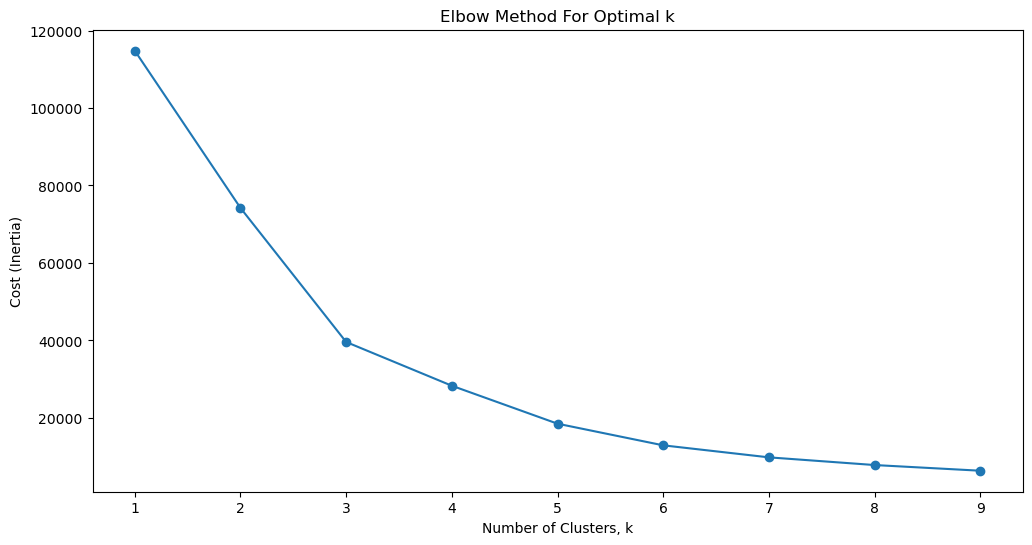

In [6]:
from sklearn.cluster import KMeans

# We'll use only the 'popularity' and 'followers' for clustering
X = df_scaled[['popularity', 'followers']]

# List to hold the values of the cost function for each 'k'
cost = []

# Initialize a range for testing 'k' values (number of clusters)
K = range(1, 10)

# Run the K-means algorithm for each 'k' and store the cost (inertia) value
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(12, 6))
plt.plot(K, cost, marker='o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
import numpy as np

# Select only numeric columns for clustering
df_numeric = df_final.select_dtypes(include=[np.number])

# Perform K-means clustering on numeric data
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_numeric['cluster'] = kmeans.fit_predict(df_numeric)

# Add the cluster column back to the original DataFrame
df_final['cluster'] = df_numeric['cluster']

# Show a sample of artists with their cluster labels
df_final.sample(25)


c:\Users\fried\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,artist_uri,artist_name,popularity,followers,genres,genre_,genre_21st century classical,genre_432hz,genre_48g,genre_5th wave emo,...,genre_zhongguo feng,genre_zilizopendwa,genre_zim urban groove,genre_zimdancehall,genre_zolo,genre_zouglou,genre_zouk,genre_zouk riddim,genre_zydeco,cluster
11787,spotify:artist:1m24736Bdew1oQVxTePOCo,Tom Tom Club,0.937469,-0.053394,"[dance rock, new romantic, new wave, no wave, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49809,spotify:artist:243alh1KgKJ2UsnjBHDRDs,Music Junkies,0.115509,-0.127480,[epicore],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33950,spotify:artist:1o9x7ez0NvhDb7gBqrYnUj,B-Case,1.142959,-0.129704,[pop edm],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45580,spotify:artist:7J207fU1tty4DWCIhJSzh0,Samy Deluxe,1.245704,0.080080,"[german alternative rap, hamburg hip hop, olds...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12446,spotify:artist:7tpoUeXq6RlClRlq2ithVu,Brandon & Leah,-0.500961,-0.121435,[],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27139,spotify:artist:3VrvtMPf98keYfWoBPx4OR,Tramaine Hawkins,0.269627,-0.077682,[gospel],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7621,spotify:artist:76PJKS3IQsf4sSayx2taE0,The Hit Crew,0.783352,-0.122498,[],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49180,spotify:artist:2dOGUGTTR0vKcexJaOOLMy,The Ghastly Ones,0.218254,-0.124256,"[gothabilly, instrumental surf, psychobilly, s...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46338,spotify:artist:7yXSHfLqmzQg1fijF8o01U,A.A.B.B.,-1.374293,-0.131619,[],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40116,spotify:artist:6Qt5HzQMgUqZAIWtuP397i,13 Original Broadway Cast,-0.141353,-0.130864,[],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Experimental Setup for Model Tuning:
>This section outlines the parameters I intend to tune. I consider the initialization method (k-means++ and random), the number of initializations (n_init with values 10 and 20), and the maximum number of iterations (max_iter with values 300 and 500).

- Model Tuning: For each combination of these parameters, I fit a K-means model to our scaled dataset. The Inertia or cost of each model is then recorded in a DataFrame.

- Results and Optimal Parameters: After running all combinations, the results are sorted by Inertia, and the model configuration with the lowest inertia is considered optimal.

- This approach allows for a systematic way to identify the optimal set of parameters for K-means clustering, thereby potentially improving the quality of the clusters.

In [8]:
def model_tuning_artists(initializations, n_inits, max_iters, df_final):
    results = []  # Initialize an empty list to store the results

    for init in initializations:
        for n_init in n_inits:
            for max_iter in max_iters:
                
                # Initialize the K-means model with the given set of parameters
                kmeans_model = KMeans(n_clusters=4, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
                
                # Fit the model to the data
                kmeans_model.fit(df_final[['popularity', 'followers']])
                
                # Retrieve the inertia (cost) of the model
                inertia = kmeans_model.inertia_
                
                # Store the results
                new_row = {'Initialization': init, 'N_Init': n_init, 'Max_Iter': max_iter, 'Inertia': inertia}
                results.append(new_row)
                
    # Convert the list of dictionaries to a DataFrame
    results_df = pd.DataFrame(results)

    return results_df

# Call the function
initializations = ['k-means++', 'random']
n_inits = [5, 10, 20, 30]
max_iters = [100, 300, 500, 1000]

results_df = model_tuning_artists(initializations, n_inits, max_iters, df_final)

# Display the results
print("Model Tuning Results:")
print(results_df.sort_values(by='Inertia'))

# Select the model with the lowest inertia as the optimal model
optimal_params = results_df.loc[results_df['Inertia'].idxmin()]
print(f"Optimal Parameters: {optimal_params}")

Model Tuning Results:
   Initialization  N_Init  Max_Iter       Inertia
14      k-means++      30       500  28309.238602
12      k-means++      30       100  28309.238602
9       k-means++      20       300  28309.238602
8       k-means++      20       100  28309.238602
15      k-means++      30      1000  28309.238602
13      k-means++      30       300  28309.238602
11      k-means++      20      1000  28309.238602
10      k-means++      20       500  28309.238602
0       k-means++       5       100  28309.721892
6       k-means++      10       500  28309.721892
5       k-means++      10       300  28309.721892
4       k-means++      10       100  28309.721892
3       k-means++       5      1000  28309.721892
2       k-means++       5       500  28309.721892
1       k-means++       5       300  28309.721892
7       k-means++      10      1000  28309.721892
29         random      30       300  28721.825162
28         random      30       100  28721.825162
27         random      20   

## Clustering

- This subset consists of columns such as 'popularity', 'followers', and the one-hot encoded 'genres'.
- The K-means algorithm was initialized with 3 clusters (k=3), using the "k-means++" method for centroid initialization. The number of times the algorithm will be run with different centroid seeds is set to 20 (n_init=20). The maximum number of iterations for a single run is 100 (max_iter=100). The random state is set for reproducibility.
- cluster labels were added back to the original DataFrame to enable comprehensive analysis, including the interpretation of the clusters in the context of the original features.

In [10]:
import numpy as np

# Select only numeric columns for clustering
df_numeric = df_final.select_dtypes(include=[np.number])

# Perform K-means clustering on numeric data
k = 3
kmeans_model = KMeans(n_clusters=k, init= 'k-means++', n_init= 20, max_iter= 100, random_state=42)
df_numeric['cluster'] = kmeans_model.fit_predict(df_numeric)

# Add the cluster column back to the original DataFrame
df_final['cluster'] = df_numeric['cluster']

# Show a sample of artists with their cluster labels
df_final.sample(10)

,artist_uri,artist_name,popularity,followers,genres,genre_,genre_21st century classical,genre_432hz,genre_48g,genre_5th wave emo,...,genre_zhongguo feng,genre_zilizopendwa,genre_zim urban groove,genre_zimdancehall,genre_zolo,genre_zouglou,genre_zouk,genre_zouk riddim,genre_zydeco,cluster
51962,spotify:artist:5LByNej67KeoBJsL4nJ9Lv,Phoenix Mourning,-1.220176,-1.311681e-01,[],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41512,spotify:artist:7r3HxO330lmabOprT2MMFK,Aklesso,0.680607,-1.260034e-01,"[christian hip hop, christian trap]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50882,spotify:artist:6O0WkZMlHi7yqizwsA8uVf,The Meltdown,1.194331,-1.239221e-01,"[funk, neo soul, retro soul, soul]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7693,spotify:artist:5nz5ZBNSvKegsJg11XwjC5,Fort Knox Five,0.475117,-1.208535e-01,[bboy],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51028,spotify:artist:1BmEPjXHyBgwuCPsQTmChB,Andre,0.372372,-1.277071e-01,[classic disco polo],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6101,spotify:artist:79kloYBe4FaMHh6lG7VaG6,Mike Reno,0.526489,-1.302344e-01,[],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45112,spotify:artist:2SROUNq07KfAc9ZFJCwSAH,Miserable,0.012764,-1.198090e-01,"[american shoegaze, bay area indie, doomgaze]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32209,spotify:artist:7vpHH4fgeCQj8VP0tvzonL,Olin And The Moon,-0.552333,-1.285331e-01,[],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37887,spotify:artist:49M9xal6ftS4qAxDKIiUjo,David Calzado y Charanga Habanera,0.000000,-1.714516e-17,[],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36620,spotify:artist:5hpLRSi6V5nzmk8YRKKqLC,Fleming & John,-0.706451,-1.301496e-01,[],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cluster Interpretation


Summary:

- Cluster 0 is characterized by artists who are moderately popular with a wide range of genres.
- Cluster 1 is the 'superstar' cluster with very high popularity and follower counts.
- Cluster 2 is the 'niche' cluster with lower popularity and a diverse set of genres.
- Cluster 3 contains artists who are quite popular but not as much as those in Cluster 1.

Cluster Summary:
         popularity  followers    genre_  genre_21st century classical  \
cluster                                                                  
0         -0.871041  -0.129423  0.640105                       0.00074   
1          0.769002   0.060490  0.065359                       0.00033   
2          2.981452  20.804730  0.000000                       0.00000   

         genre_432hz  genre_48g  genre_5th wave emo  genre_8-bit  genre_8d  \
cluster                                                                      
0           0.000111   0.000000            0.000074     0.000074  0.000000   
1           0.000033   0.000033            0.000231     0.000066  0.000033   
2           0.000000   0.000000            0.000000     0.000000  0.000000   

         genre_a cappella  ...  genre_zhongguo feng  genre_zilizopendwa  \
cluster                    ...                                            
0                0.001851  ...             0.000000            0.000037

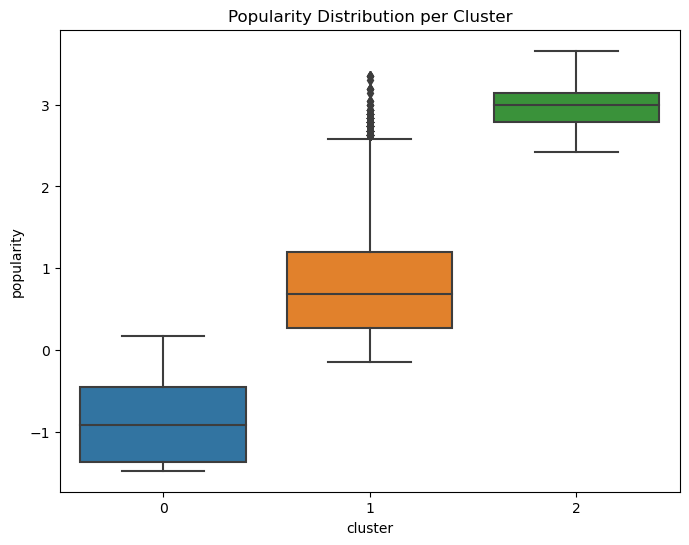

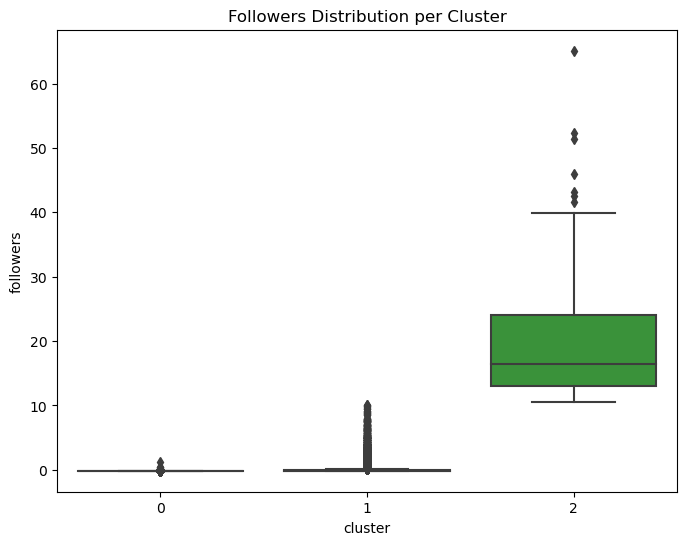

In [11]:
# Calculate the mean of each feature for each cluster
try:
    numeric_columns = df_final.select_dtypes(include=[np.number]).columns.tolist()
    cluster_summary = df_final.groupby('cluster')[numeric_columns].mean()
    print("Cluster Summary:")
    print(cluster_summary)
except Exception as e:
    print(f"An error occurred: {e}")

# Plotting the feature distribution in each cluster
features = ['popularity', 'followers']
try:
    for feature in features:
        if feature != 'cluster':  # Exclude the 'cluster' column from plotting
            plt.figure(figsize=(8, 6))
            sns.boxplot(x='cluster', y=feature, data=df_final)
            plt.title(f'{feature.capitalize()} Distribution per Cluster')
            plt.show()
except Exception as e:
    print(f"An error occurred while plotting: {e}")

In [13]:
# Frequency count of genres in each cluster

# Create a list of all genres
genres = df_final.select_dtypes(include=[np.number]).columns.tolist() # Get all numeric columns
genres = [genre for genre in genres if genre.startswith('genre_')] # Filter the genres only

# Create a DataFrame to hold the frequency count of genres in each cluster
df_genres = pd.DataFrame(columns=['cluster', 'genre', 'count'])

# Iterate over each cluster
for cluster in range(0, 4):
    # Get the total number of artists in the cluster
    total_artists = df_final[df_final['cluster'] == cluster].shape[0]
    
    # Iterate over each genre
    for genre in genres:
        # Get the total number of artists in the cluster with the given genre
        total_genre = df_final[(df_final['cluster'] == cluster) & (df_final[genre] == 1)].shape[0]
        
        # Calculate the percentage of artists with the given genre in the cluster
        percentage = (total_genre / total_artists) * 100 if total_artists != 0 else 0
        
        # Add the result to the DataFrame
        df_genres = df_genres._append({'cluster': cluster, 'genre': genre, 'count': percentage}, ignore_index=True)

# Convert the 'cluster' column to integer type
df_genres['cluster'] = df_genres['cluster'].astype(int)

for cluster in df_genres['cluster'].unique():
    print(f"Cluster {cluster}:")
    print(df_genres[df_genres['cluster'] == cluster].sort_values(by='count', ascending=False).head(10))
    print("\n")

Cluster 0:
      cluster                           genre      count
0           0                          genre_  64.010511
147         0            genre_anthem worship   0.236870
4321        0                genre_vapor soul   0.214664
2014        0           genre_indie poptimism   0.207262
3746        0               genre_shimmer pop   0.196158
7           0                genre_a cappella   0.185055
1207        0  genre_deep underground hip hop   0.177653
975         0               genre_country pop   0.173952
1999        0          genre_indie electropop   0.166549
2035        0             genre_indiecoustica   0.166549


Cluster 1:
      cluster                genre     count
4481        1               genre_  6.535948
8021        1           genre_rock  1.729715
5531        1      genre_dance pop  1.525054
5854        1  genre_electro house  1.445831
6390        1        genre_hip hop  1.406219
7745        1            genre_pop  1.333597
5840        1            genre_edm

## Word Cloud of genres

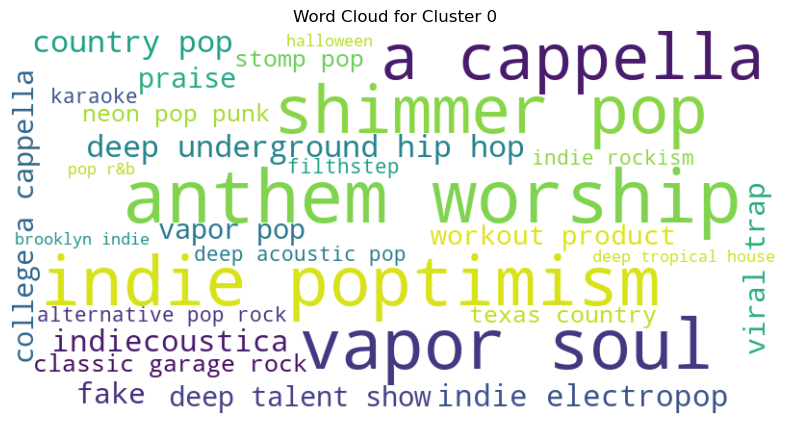

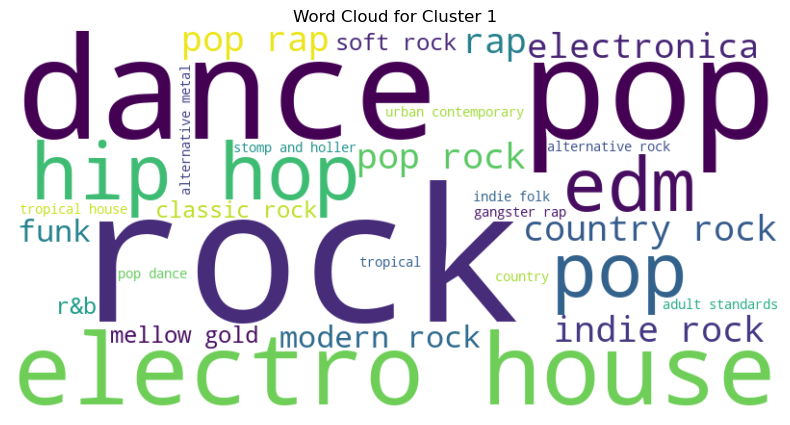

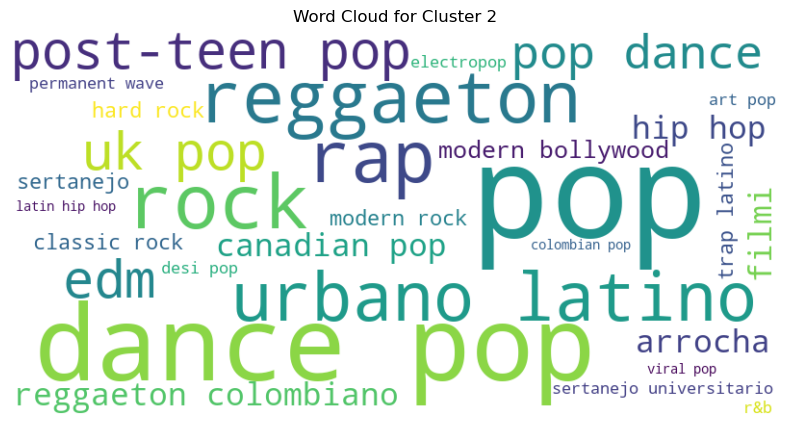

In [16]:
from wordcloud import WordCloud

# Function to generate a word cloud for a given cluster
def generate_wordcloud(cluster_data, cluster_num):
    # Create a dictionary where keys are genres and values are their corresponding counts
    genre_dict = {}
    for index, row in cluster_data.iterrows():
        genre_dict[row['genre'].replace('genre_', '')] = row['count']
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_dict)
    
    # Plotting the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_num}")
    plt.show()

# Generate word clouds for each cluster
for cluster_num in range(3):
    cluster_data = df_genres[df_genres['cluster'] == cluster_num].sort_values(by='count', ascending=False).head(30)
    generate_wordcloud(cluster_data, cluster_num)

# Artist Discovery / Recommendation

In [17]:
def recommend_artists(favorite_artist, top_n):
    # Find the cluster to which the favorite artist belongs
    user_cluster = df_final[df_final['artist_name'] == favorite_artist]['cluster'].values[0]
    
    # Get all artists in that cluster
    artists_in_cluster = df_final[df_final['cluster'] == user_cluster]
    
    # Remove the favorite artist from recommendations
    artists_in_cluster = artists_in_cluster[artists_in_cluster['artist_name'] != favorite_artist]
    
    # Sort them by popularity and followers for popular artists
    popular_artists = artists_in_cluster.sort_values(by=['popularity', 'followers'], ascending=False).head(top_n)
    
    # Sort them by popularity and followers for unknown artists (ascending order)
    unknown_artists = artists_in_cluster.sort_values(by=['popularity', 'followers'], ascending=True).head(top_n)
    
    # Recommend the top N popular and unknown artists
    popular_recommendations = popular_artists['artist_name'].tolist()
    unknown_recommendations = unknown_artists['artist_name'].tolist()
    
    return popular_recommendations, unknown_recommendations

# Test the function
favorite_artist = "Ariana Grande"  # Replace with an artist of your choice
top_n = 5  # Number of recommendations
popular_recommendations, unknown_recommendations = recommend_artists(favorite_artist, top_n)

print("If you like {}, you might also like these popular artists:\n{}".format(favorite_artist, '\n'.join(popular_recommendations)))
print("\nIf you like {}, you might also discover these lesser-known artists:\n{}".format(favorite_artist, '\n'.join(unknown_recommendations)))

If you like Ariana Grande, you might also like these popular artists:
Taylor Swift
Bad Bunny
The Weeknd
Drake
Karol G

If you like Ariana Grande, you might also discover these lesser-known artists:
Neha Kakkar
ZAYN
Badshah
Sebastian Yatra
Demi Lovato


## Save data as pkl

In [ ]:
import pickle

# Get cluster labels
labels = kmeans.labels_

# You can add these labels back to your original DataFrame if you wish
df_final['cluster_label'] = labels

# Save the cluster labels and the KMeans model itself
with open("artists_cluster_labels.pkl", "wb") as f:
    pickle.dump(df_final, f)

with open("artists_kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)